In [1]:
import numpy as np 
import pandas as pd

In [2]:
import os

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D


In [4]:
import cv2

In [5]:
import os
print(os.listdir("./input"))

import zipfile

with zipfile.ZipFile("./input/train.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("./input/test1.zip","r") as z:
    z.extractall(".")
# print(os.listdir("/kaggle/working/train"))


['sampleSubmission.csv', 'test1.zip', 'train.zip']


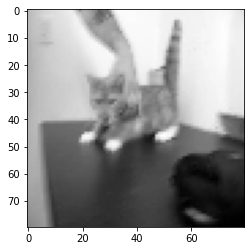

In [6]:
main_dir = 'D:\Prayag Files\Coding\Python\Projects\Image Recognition'
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [7]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)
    

In [8]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [9]:
X = X/255.0

In [10]:
import seaborn as sns

In [11]:
import pickle

pickle.dump( X, open( "train_x", "wb" ) )
pickle.dump( y, open( "train_y", "wb" ) )

In [12]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
train_dir = "test1"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [14]:
predictions = model.predict(X_test)

391/391 [==============================] - 62s 125ms/step


In [15]:
predicted_val = [int(round(p[0])) for p in predictions]

In [16]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [21]:
submission_df.to_csv("catsndogs.csv", index=False)

In [22]:
len(main_dir)

56